In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('Frogs_MFCCs.csv')

In [ ]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [ ]:
missing= df.isnull().sum()
print("The missing values are:\n", missing[missing > 0])

missing_percentage = (missing / len(df)) * 100
print("\nThe percentage of missing values are:\n", missing_percentage[missing_percentage > 0])

The missing values are:
 Series([], dtype: int64)

The percentage of missing values are:
 Series([], dtype: float64)


Hence there are no missing values.

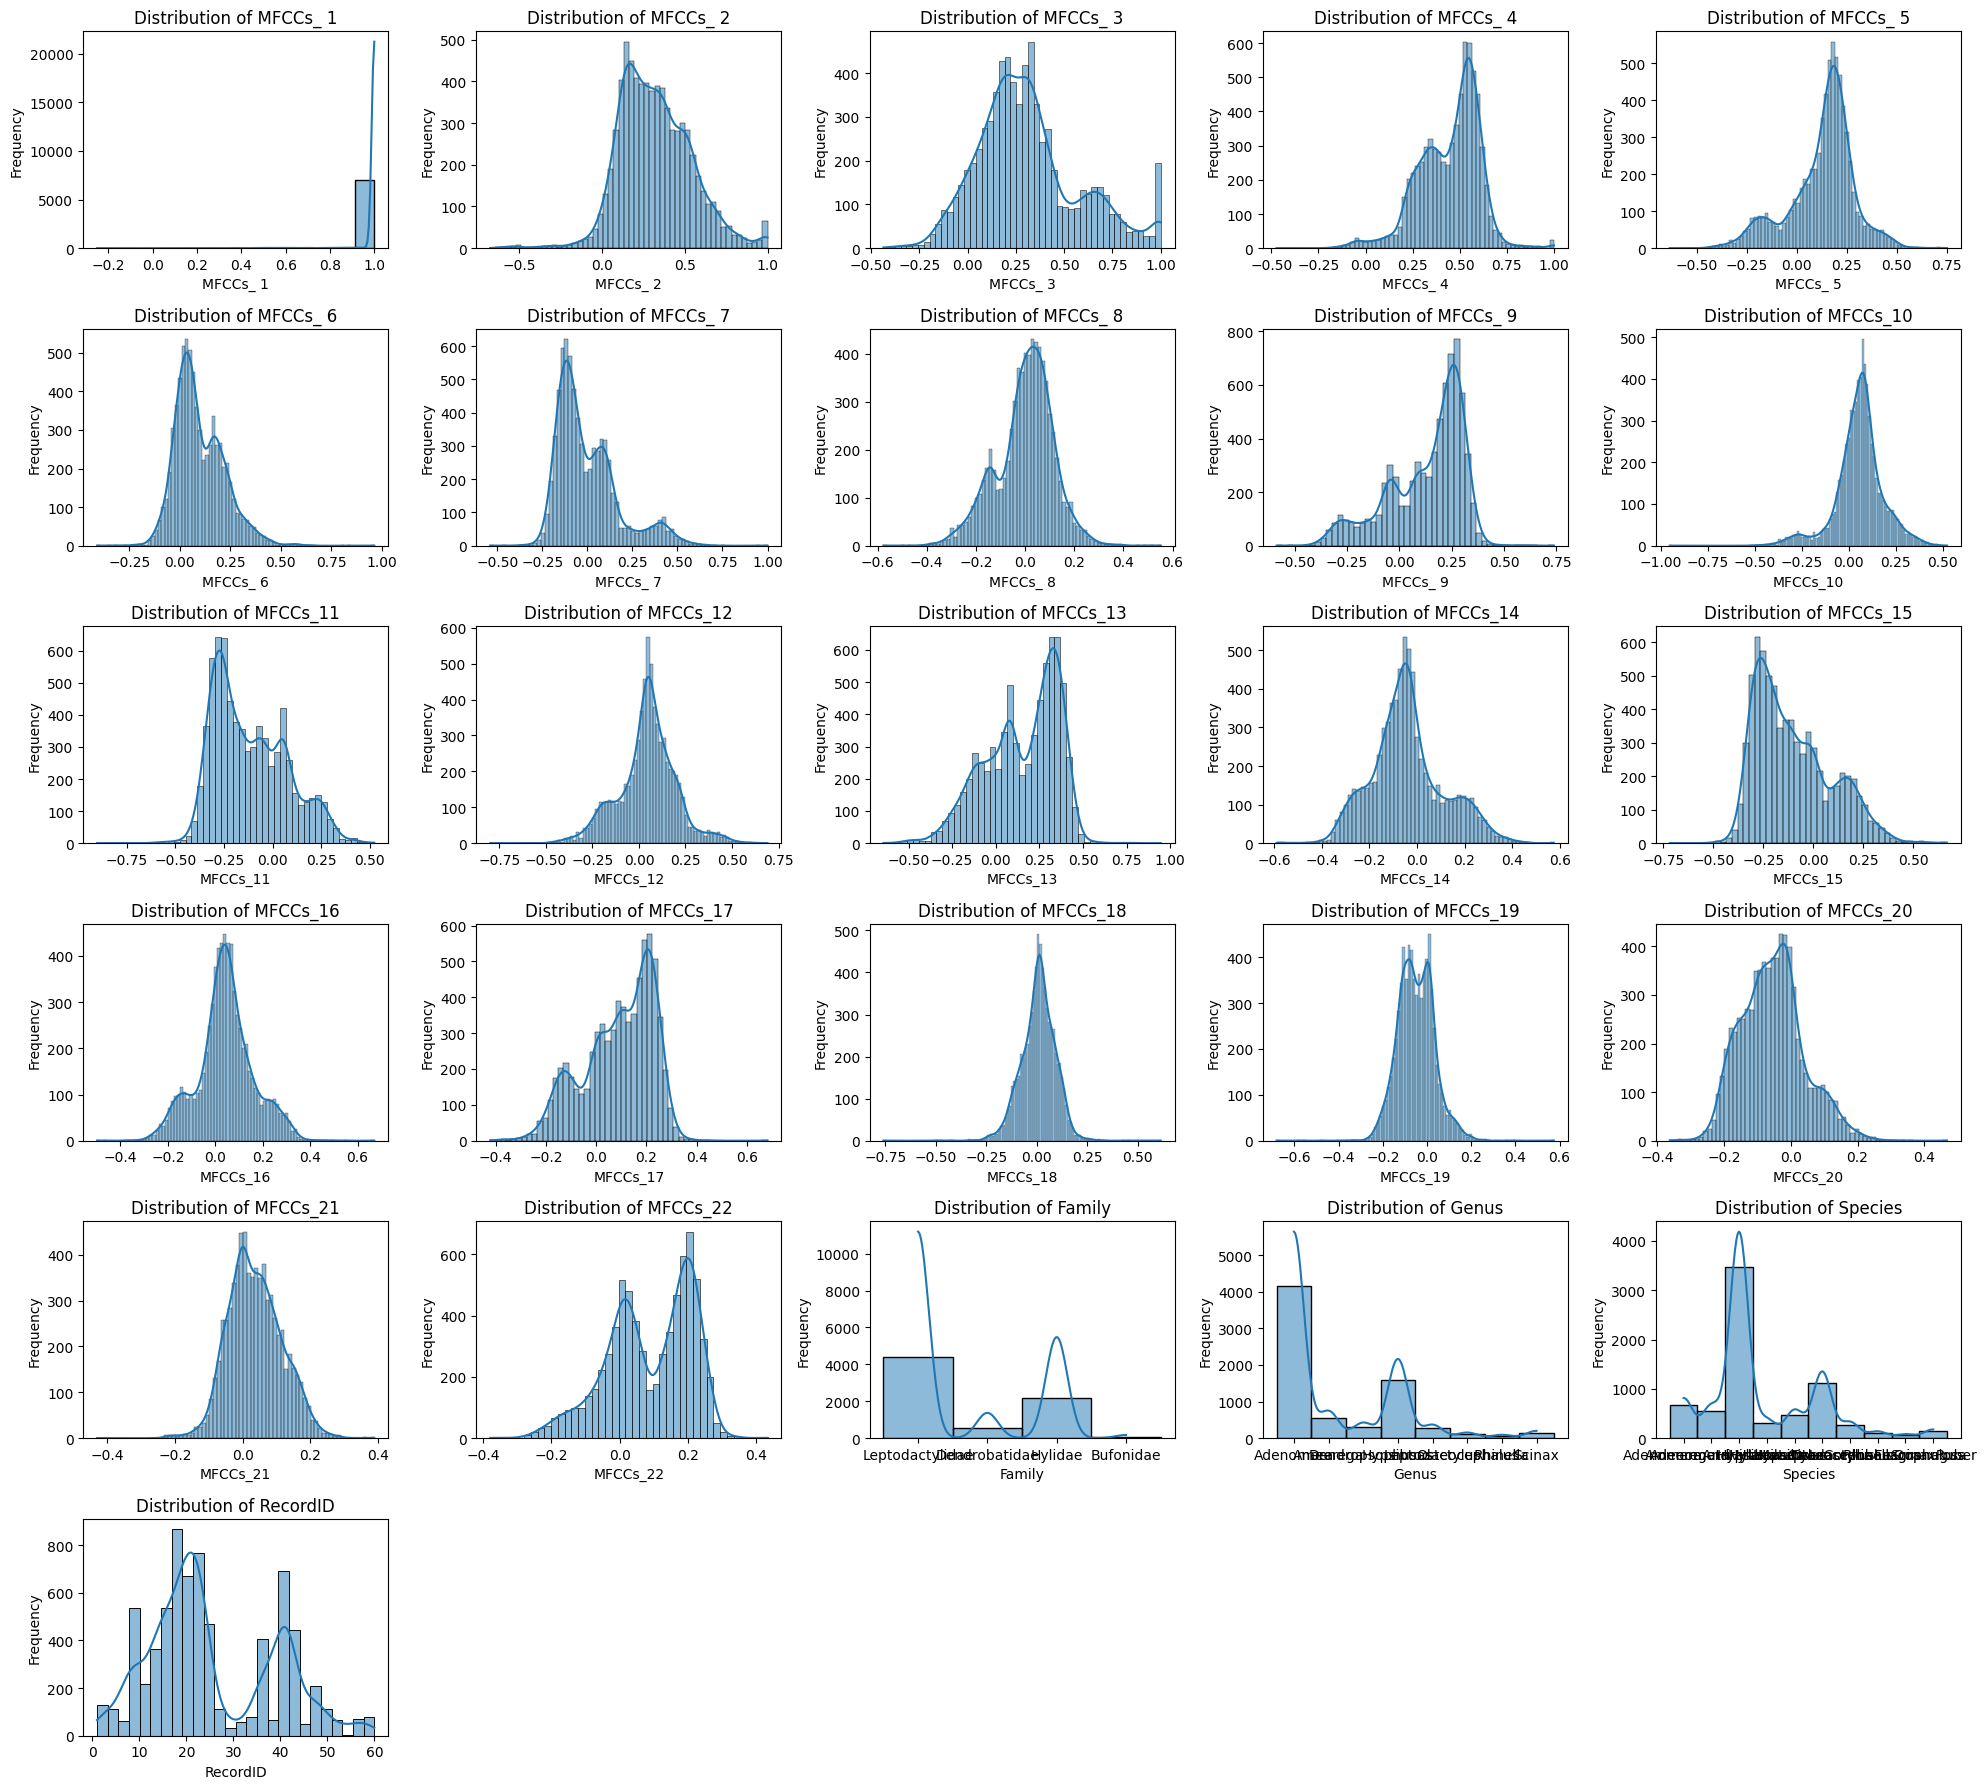

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Plot histograms for each feature
for i, col in enumerate(df.columns):
    plt.subplot(6, 5, i + 1)  # Changed to 6 rows x 5 columns
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

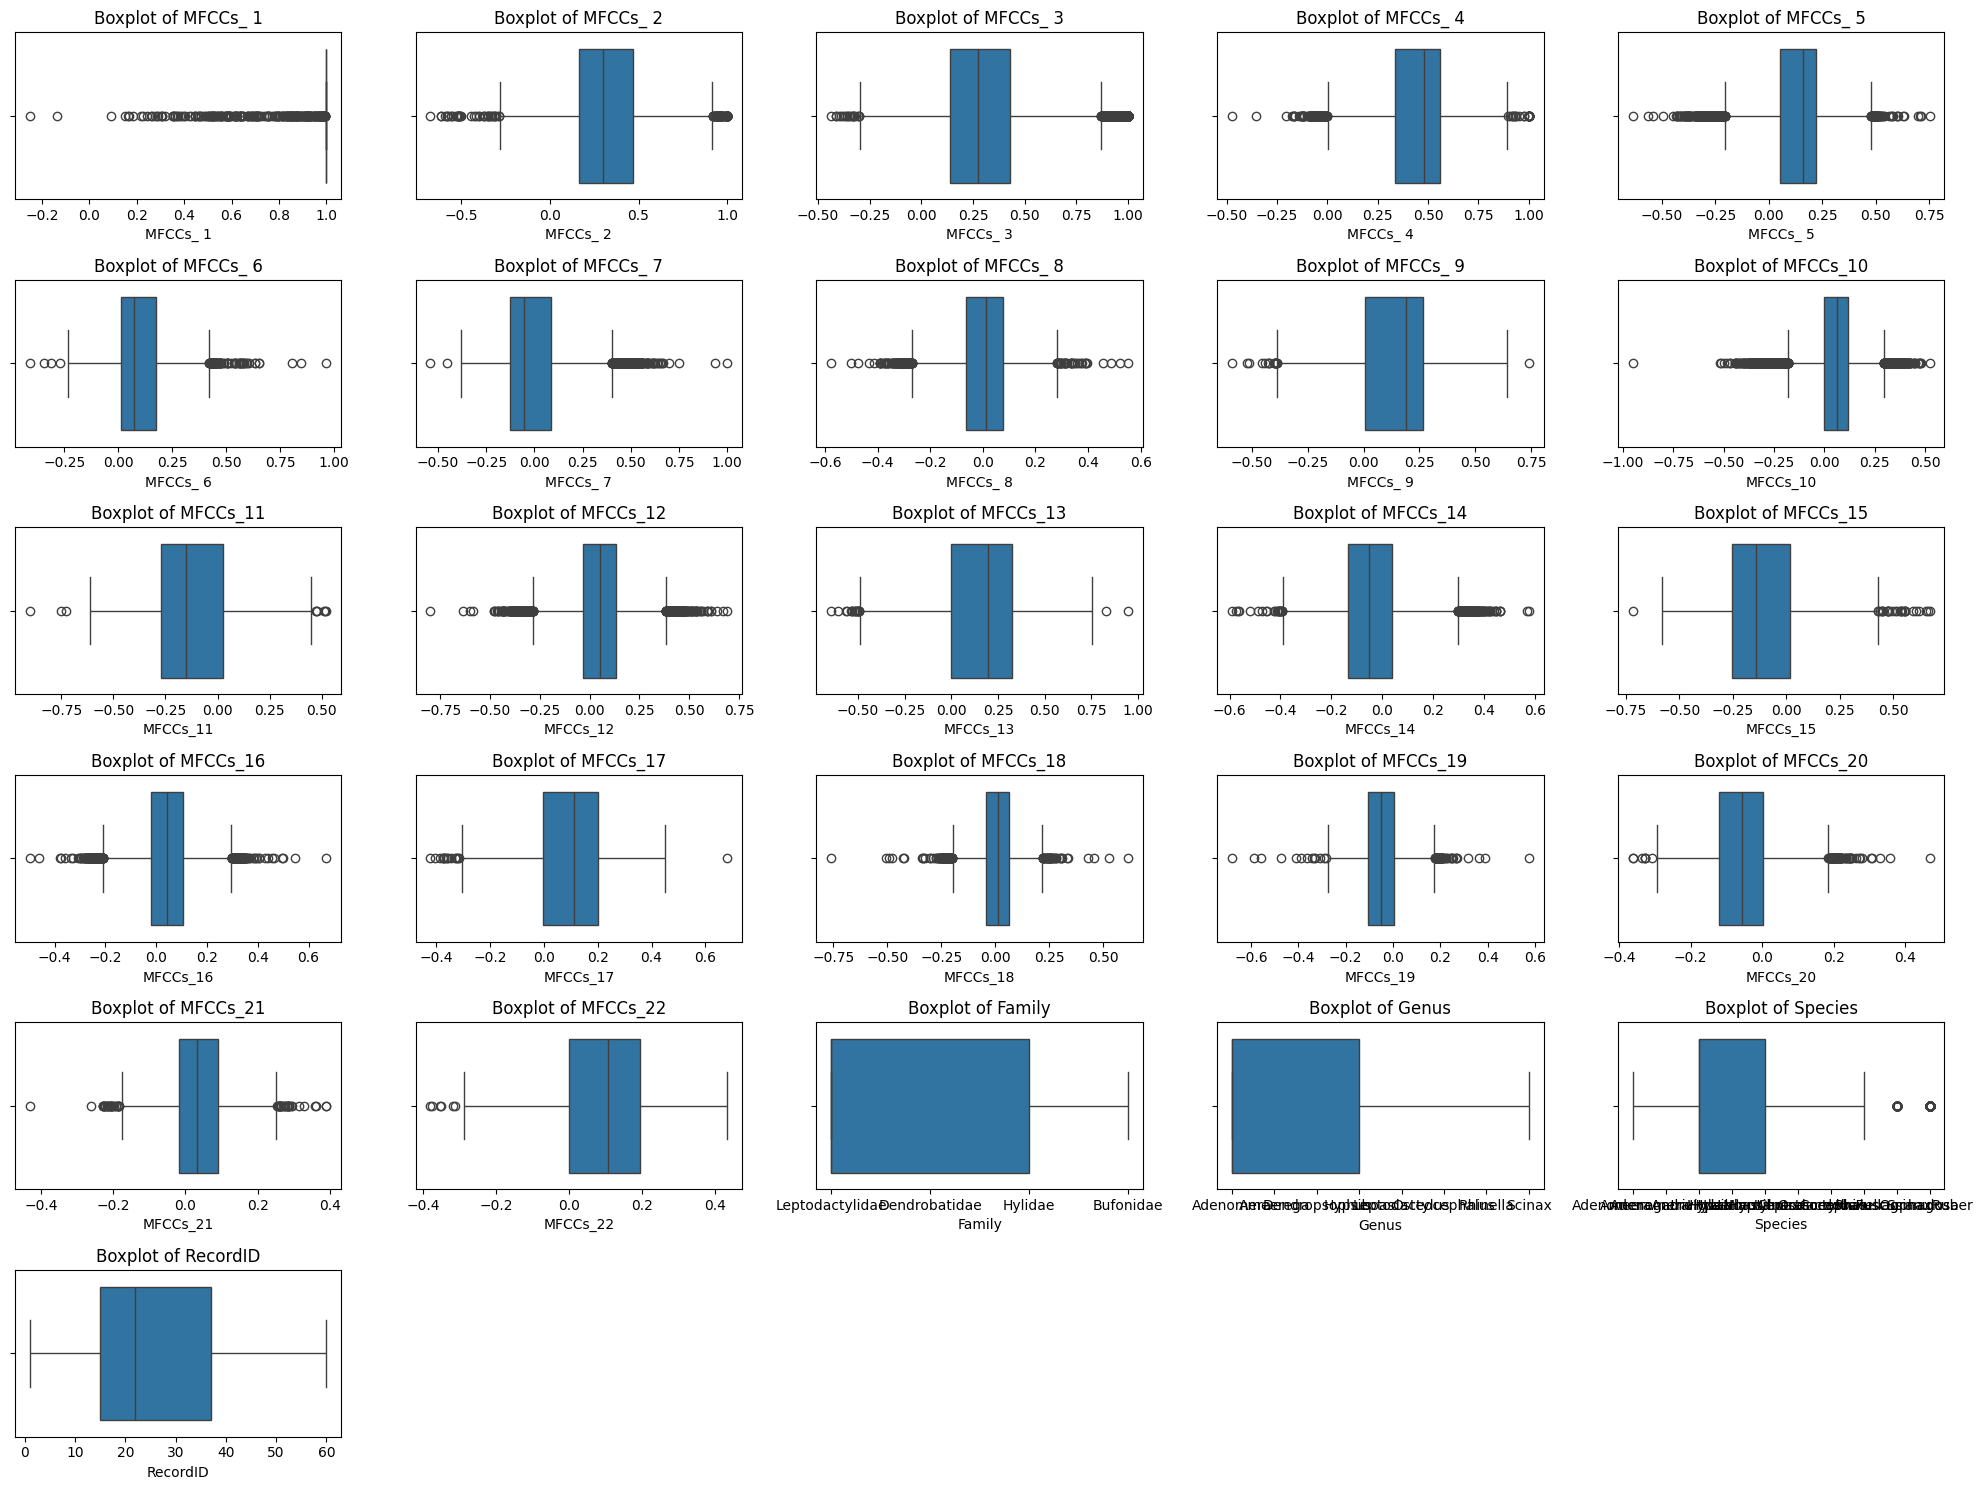

In [ ]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(df.columns):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [ ]:

nu_features = df.select_dtypes(include=['number']).columns
numerical_df = df[nu_features]

scalr_version = StandardScaler()

scaled_features = scalr_version.fit_transform(numerical_df)

scaled_df = pd.DataFrame(scaled_features, columns=nu_features, index=df.index)

f_df = pd.concat([df.drop(columns=nu_features), scaled_df], axis=1)

In [ ]:
df = f_df

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = interaction.fit_transform(scaled_df)

interaction_df = pd.DataFrame(interaction_features, columns=interaction.get_feature_names_out(scaled_df.columns), index=df.index)

df = pd.concat([df, interaction_df], axis=1)


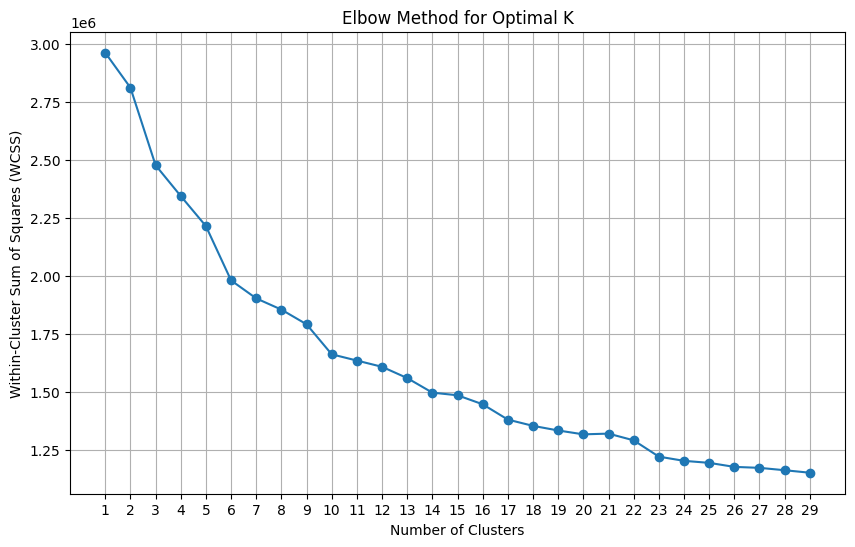

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

range_n_clusters = range(1, 30)
wcss = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)  # Fit the model to the data
    wcss.append(kmeans.inertia_)  # WCSS is the inertia_

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

optimal_k = 16

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df)

silhouette_avg = silhouette_score(df, clusters)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg:.6f}')

Silhouette Score for 16 clusters: 0.153104


Silhouette Score for 2 clusters: 0.6463
Silhouette Score for 3 clusters: 0.3712
Silhouette Score for 4 clusters: 0.1954
Silhouette Score for 5 clusters: 0.1745
Silhouette Score for 6 clusters: 0.2059
Silhouette Score for 7 clusters: 0.2142
Silhouette Score for 8 clusters: 0.1830
Silhouette Score for 9 clusters: 0.1853
Silhouette Score for 10 clusters: 0.2116
Silhouette Score for 11 clusters: 0.2103
Silhouette Score for 12 clusters: 0.2109
Silhouette Score for 13 clusters: 0.2123
Silhouette Score for 14 clusters: 0.1585
Silhouette Score for 15 clusters: 0.1591
Silhouette Score for 16 clusters: 0.1531
Silhouette Score for 17 clusters: 0.1789
Silhouette Score for 18 clusters: 0.1841
Silhouette Score for 19 clusters: 0.1837
Silhouette Score for 20 clusters: 0.1855
Silhouette Score for 21 clusters: 0.1862
Silhouette Score for 22 clusters: 0.1869
Silhouette Score for 23 clusters: 0.1984
Silhouette Score for 24 clusters: 0.2050
Silhouette Score for 25 clusters: 0.2035
Silhouette Score for 26 

Silhouette Score for 30 clusters: 0.1966


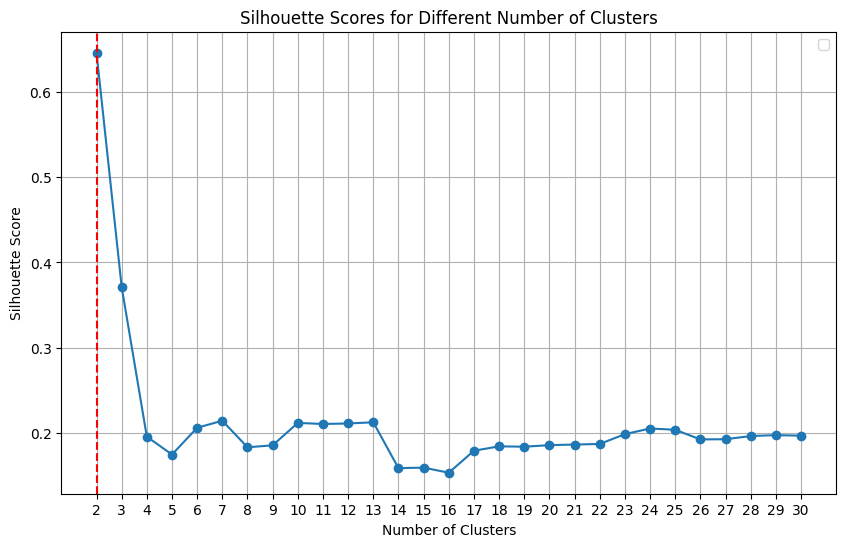

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


silhouette_scores = []
k_values = range(2, 31)

for n_clusters in k_values:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df)

    silhouette_avg = silhouette_score(df, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.4f}')

max_silhouette_score = max(silhouette_scores)
best_k = k_values[silhouette_scores.index(max_silhouette_score)]


plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.axvline(best_k, color='red', linestyle='--')
plt.legend()
plt.grid()
plt.show()

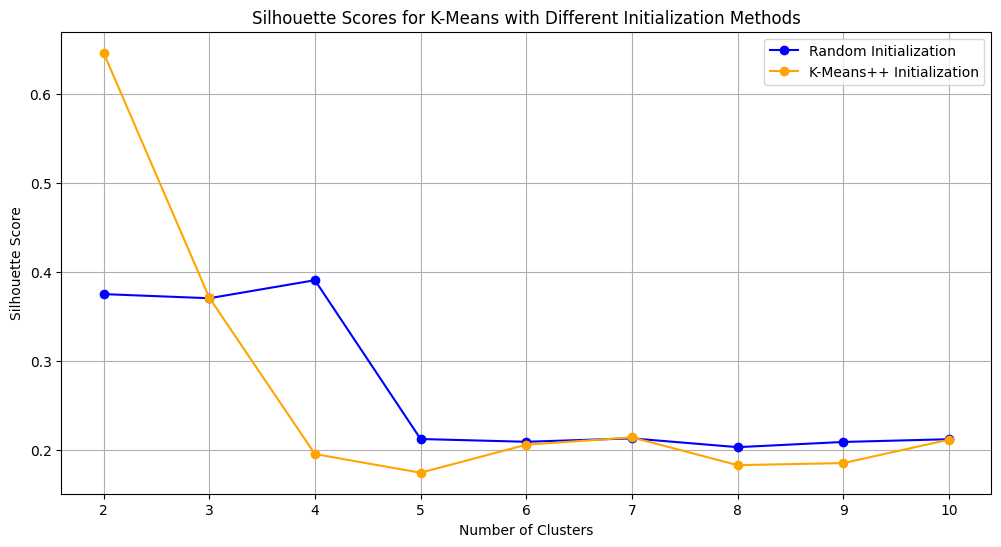

Best Silhouette Score with Random Initialization: 0.3907 (K=4)
Best Silhouette Score with K-Means++ Initialization: 0.6463 (K=2)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 11)
random_silhouette_scores = []
kmeans_plus_silhouette_scores = []

for n_clusters in k_values:
    kmeans_random = KMeans(n_clusters=n_clusters, init='random', random_state=42)
    random_clusters = kmeans_random.fit_predict(df)
    random_silhouette_avg = silhouette_score(df, random_clusters)
    random_silhouette_scores.append(random_silhouette_avg)

    kmeans_plus = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_plus_clusters = kmeans_plus.fit_predict(df)
    kmeans_plus_silhouette_avg = silhouette_score(df, kmeans_plus_clusters)
    kmeans_plus_silhouette_scores.append(kmeans_plus_silhouette_avg)

plt.figure(figsize=(12, 6))
plt.plot(k_values, random_silhouette_scores, marker='o', label='Random Initialization', color='blue')
plt.plot(k_values, kmeans_plus_silhouette_scores, marker='o', label='K-Means++ Initialization', color='orange')
plt.title('Silhouette Scores for K-Means with Different Initialization Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

best_random_score = max(random_silhouette_scores)
best_k_random = k_values[random_silhouette_scores.index(best_random_score)]

best_kmeans_plus_score = max(kmeans_plus_silhouette_scores)
best_k_plus = k_values[kmeans_plus_silhouette_scores.index(best_kmeans_plus_score)]

print(f'Best Silhouette Score with Random Initialization: {best_random_score:.4f} (K={best_k_random})')
print(f'Best Silhouette Score with K-Means++ Initialization: {best_kmeans_plus_score:.4f} (K={best_k_plus})')

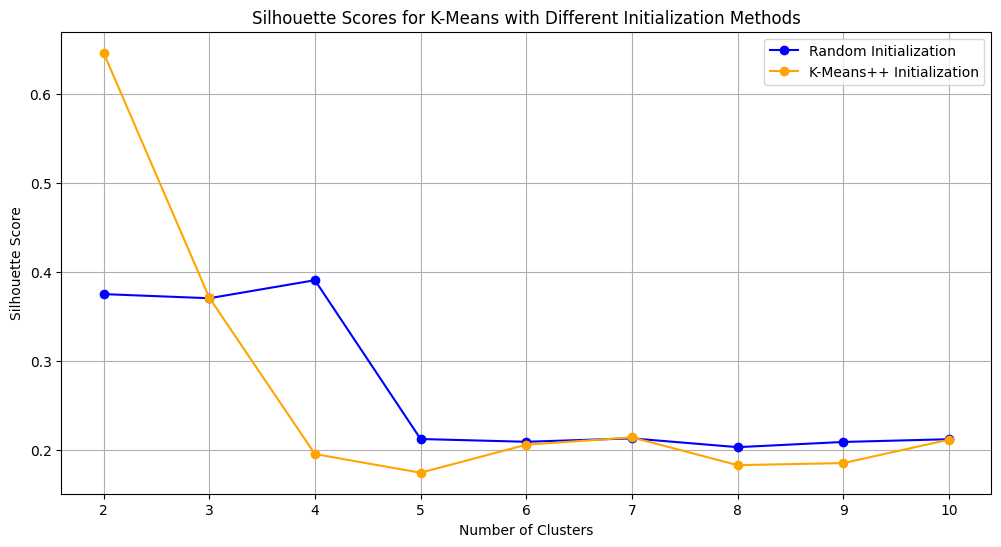

Best Silhouette Score with Random Initialization: 0.3907 (K=4)
Best Silhouette Score with K-Means++ Initialization: 0.6463 (K=2)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range for clusters and lists to store silhouette scores
k_values = range(2, 11)
random_silhouette_scores = []
kmeans_plus_silhouette_scores = []

# Iterate over different cluster numbers
for n_clusters in k_values:
    # KMeans with random initialization
    kmeans_random = KMeans(n_clusters=n_clusters, init='random', random_state=42)
    random_clusters = kmeans_random.fit_predict(df)
    random_silhouette_avg = silhouette_score(df, random_clusters)
    random_silhouette_scores.append(random_silhouette_avg)

    # KMeans with k-means++ initialization
    kmeans_plus = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_plus_clusters = kmeans_plus.fit_predict(df)
    kmeans_plus_silhouette_avg = silhouette_score(df, kmeans_plus_clusters)
    kmeans_plus_silhouette_scores.append(kmeans_plus_silhouette_avg)

# Plot configuration
plt.figure(figsize=(12, 6))
colors = {'random': 'blue', 'kmeans++': 'orange'}
plt.plot(k_values, random_silhouette_scores, marker='o', label='Random Initialization', color=colors['random'])
plt.plot(k_values, kmeans_plus_silhouette_scores, marker='o', label='K-Means++ Initialization', color=colors['kmeans++'])
plt.title('Silhouette Scores for K-Means with Different Initialization Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.legend()
plt.grid()

# Display plot
plt.show()

# Identify best silhouette scores and corresponding k values
best_random_score = max(random_silhouette_scores)
best_k_random = k_values[random_silhouette_scores.index(best_random_score)]

best_kmeans_plus_score = max(kmeans_plus_silhouette_scores)
best_k_plus = k_values[kmeans_plus_silhouette_scores.index(best_kmeans_plus_score)]

# Print results with formatted precision
print(f'Best Silhouette Score with Random Initialization: {best_random_score:.4f} (K={best_k_random})')
print(f'Best Silhouette Score with K-Means++ Initialization: {best_kmeans_plus_score:.4f} (K={best_k_plus})')


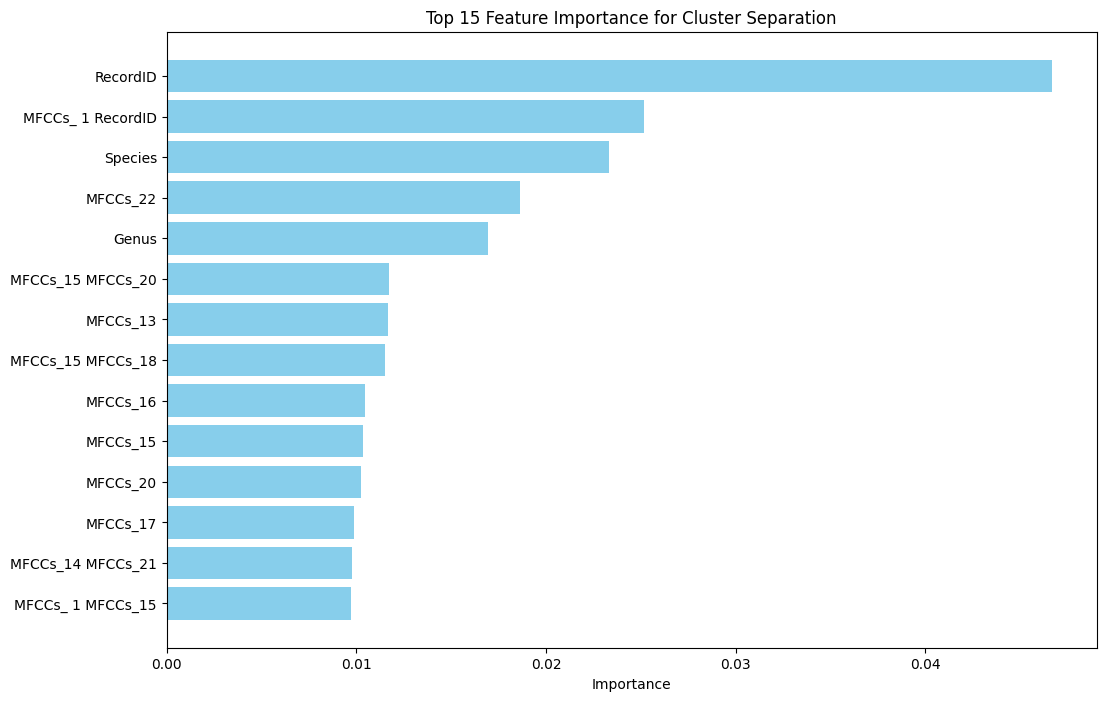

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


optimal_k = 16
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df)

df['Cluster'] = clusters

# Feature importance using Random Forest
X = df.drop(columns=['Cluster'])  # Features (MFCCs)
y = df['Cluster']  # Cluster labels

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 15 features
top_features = feature_importance_df.head(15)

# Plotting Feature Importances for Top 15 Features
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance for Cluster Separation')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()

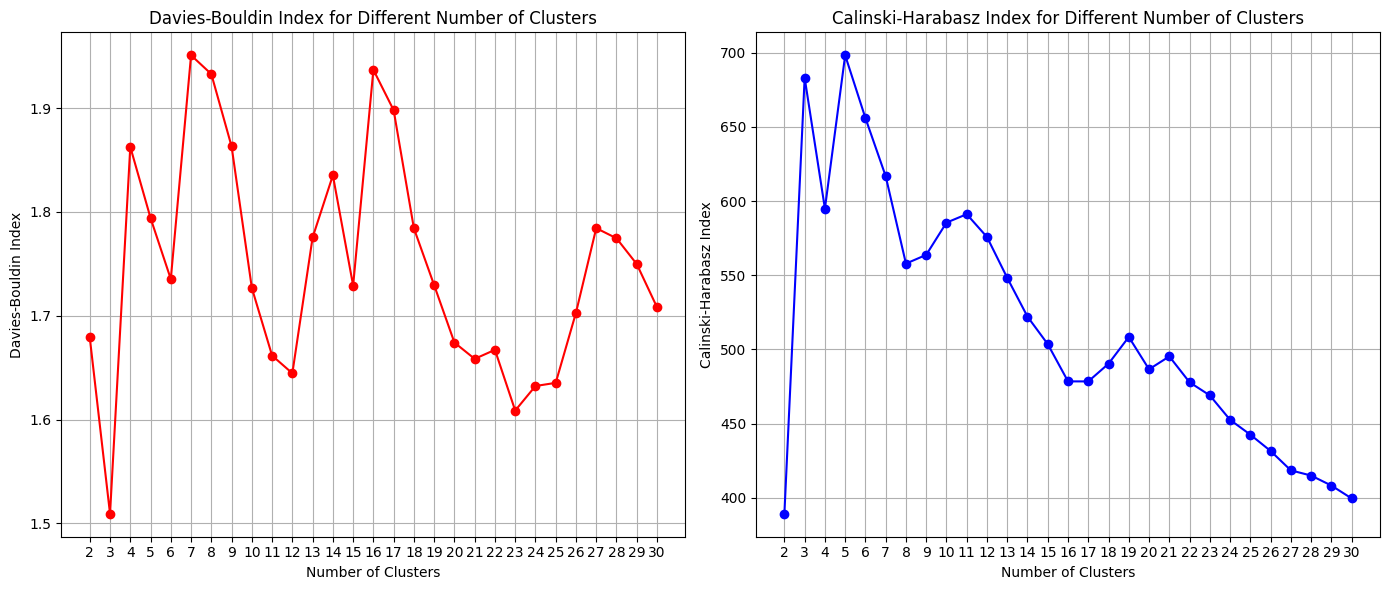

Best Davies-Bouldin Index: 1.5093 (K=3)
Best Calinski-Harabasz Index: 698.3141 (K=5)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score


k_values = range(2, 31)  # Test with clusters from 2 to 30
davies_bouldin_scores = []
calinski_harabasz_scores = []

for n_clusters in k_values:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(df)

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(df, clusters)
    davies_bouldin_scores.append(db_index)

    # Calculate Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(df, clusters)
    calinski_harabasz_scores.append(ch_index)

# Plotting the metrics
plt.figure(figsize=(14, 6))

# Davies-Bouldin Index Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, davies_bouldin_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(k_values)
plt.grid()

# Calinski-Harabasz Index Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o', color='blue')
plt.title('Calinski-Harabasz Index for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.xticks(k_values)
plt.grid()

plt.tight_layout()
plt.show()

# Print the best Davies-Bouldin and Calinski-Harabasz scores
best_db_index = min(davies_bouldin_scores)
best_k_db = k_values[davies_bouldin_scores.index(best_db_index)]

best_ch_index = max(calinski_harabasz_scores)
best_k_ch = k_values[calinski_harabasz_scores.index(best_ch_index)]

print(f'Best Davies-Bouldin Index: {best_db_index:.4f} (K={best_k_db})')
print(f'Best Calinski-Harabasz Index: {best_ch_index:.4f} (K={best_k_ch})')

       Algorithm  Silhouette Score  Davies-Bouldin Index  \
0        K-Means          0.355191              1.862718   
1  Agglomerative          0.364125              1.627505   
2         DBSCAN         -0.149357              1.328821   

   Calinski-Harabasz Index  
0               594.931246  
1               740.359325  
2                 4.149743  


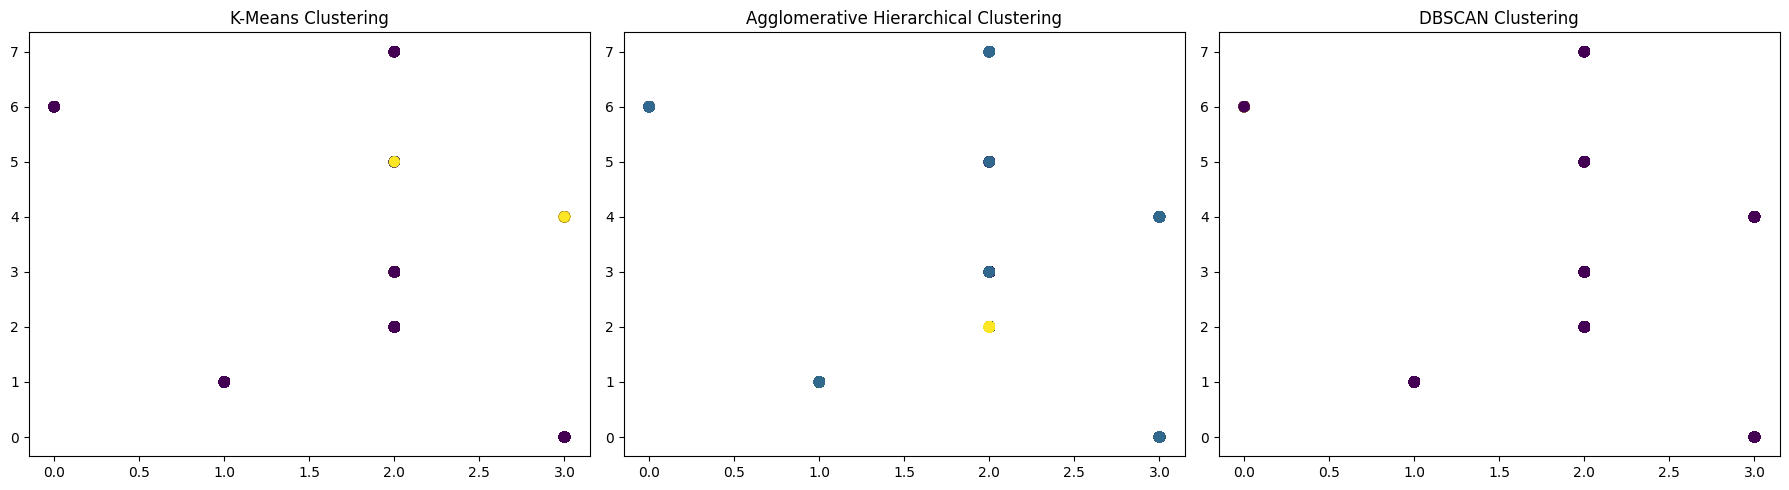

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# K-Means Clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(df)

# Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_clusters = agg_clustering.fit_predict(df)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_clusters = dbscan.fit_predict(df)

# Calculate Metrics for K-Means
kmeans_silhouette = silhouette_score(df, kmeans_clusters)
kmeans_db_index = davies_bouldin_score(df, kmeans_clusters)
kmeans_ch_index = calinski_harabasz_score(df, kmeans_clusters)

# Calculate Metrics for Agglomerative Clustering
agg_silhouette = silhouette_score(df, agg_clusters)
agg_db_index = davies_bouldin_score(df, agg_clusters)
agg_ch_index = calinski_harabasz_score(df, agg_clusters)

# Calculate Metrics for DBSCAN
# DBSCAN can produce -1 for noise, handle it in the silhouette score calculation
if len(set(dbscan_clusters)) > 1:  # Only compute if there are clusters
    dbscan_silhouette = silhouette_score(df, dbscan_clusters)
else:
    dbscan_silhouette = -1  # Assign a default value for silhouette if only noise

dbscan_db_index = davies_bouldin_score(df, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else np.nan
dbscan_ch_index = calinski_harabasz_score(df, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else np.nan

# Compile Results
results = pd.DataFrame({
    'Algorithm': ['K-Means', 'Agglomerative', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette, dbscan_silhouette],
    'Davies-Bouldin Index': [kmeans_db_index, agg_db_index, dbscan_db_index],
    'Calinski-Harabasz Index': [kmeans_ch_index, agg_ch_index, dbscan_ch_index]
})

print(results)

# Visualization of Clustering Results
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=agg_clusters, cmap='viridis', s=50)
plt.title('Agglomerative Hierarchical Clustering')

plt.subplot(1, 3, 3)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dbscan_clusters, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()